In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [28]:
data = pd.read_csv('final-data.csv')

In [29]:
data['Week Endings'] = pd.to_datetime(data['Week Endings'], errors = 'raise')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Week Endings          1266 non-null   datetime64[ns]
 1   Avg Ticket Price ($)  1266 non-null   float64       
 2   Top Ticket Price ($)  1266 non-null   float64       
 3   Seats Sold            1266 non-null   int64         
 4   Seats in Theatre      1266 non-null   int64         
 5   % Cap                 1266 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 59.5 KB


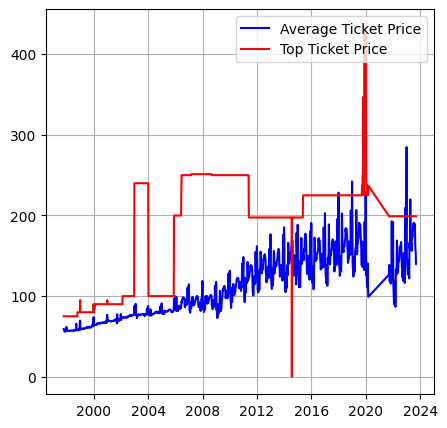

In [31]:
# Some basic plotting to check data and 
# data scale to determine whether data needs to be normalised or not
# before being used with the sequence model for prediction
# year = np.array(range(data.shape[0])) + 757
time = data['Week Endings']
plt.figure(figsize=(5, 5))
plt.grid(True)
plt.plot(time, data['Avg Ticket Price ($)'], color='b', label="Average Ticket Price")
plt.plot(time, data['Top Ticket Price ($)'], color='r', label="Top Ticket Price")
plt.legend(loc=1)
plt.show()

In [32]:
series = data['Avg Ticket Price ($)']
split_time = int(len(series) * 0.7)

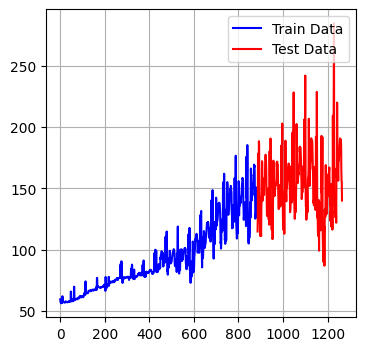

In [34]:
train_series = series[:split_time]
train_time = time[:split_time]
test_series = series[split_time:]
test_time = time[split_time:]

plt.figure(figsize=(4, 4))
plt.grid(True)
plt.plot(train_series, color='b', label="Train Data")
plt.plot(test_series, color='r', label="Test Data")
plt.legend(loc=1)
plt.show()